## This is the jupyter notebook for generating results for CS760 HW2.

In [1]:
!pip install anytree ## anytree us used only for visualization


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import random
from anytree import Node, RenderTree
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from sklearn.metrics import mean_absolute_error
from anytree.exporter import UniqueDotExporter
from random import randint
from DTree import Decisiontree

## Helper functions

In [5]:
def print_tree_(tree):
    print(tree)
    for item,value in tree.items():
      if item =='Left':
        return print_tree_(value)
      elif item == 'Right':
        return print_tree_(value)
def tr(node,column):
  if node['leaf'] == True:
    result = node['Pred']
    return node
  else:
    for item,value in node.items():
      if item =='Threshold':
        #print(column[int(value[1])],value[0])
        if column[int(value[1])]>=value[0]:
          return tr(node['Right'],column)
        elif column[int(value[1])]<value[0]:
          return tr(node['Left'],column)
def tr_count(node,column,count):
  if node['leaf'] == True:
    result = node['Pred']
    count+=1
    return node,count
  else:
    for item,value in node.items():
      if item =='Threshold':
        count+=1
        #print(column[int(value[1])],value[0])
        if column[int(value[1])]>=value[0]:
          return tr_count(node['Right'],column,count)
        elif column[int(value[1])]<value[0]:
          return tr_count(node['Left'],column,count)
def print_tree_iter(node):
  if node['leaf'] == True:
    result = node['Pred']
    return 0
  else:
    for item,value in node.items():
      if item =='Threshold':
        print(node['Right'],node['Left'])
        if len(node['Right'])>0:
            return print_tree_iter(node['Right'])
        elif len(node['Left'])>0:
            return print_tree_iter(node['Left'])

## Q1(2)

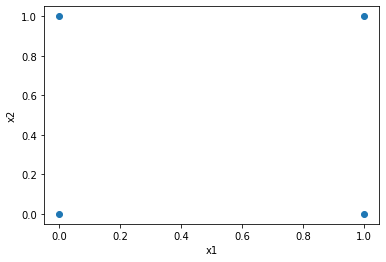

In [14]:
datapoint_x = np.asarray( [0, 0, 1, 1])
datapoint_y = np.asarray([0, 1, 0, 1])
plt.plot(datapoint_x,datapoint_y,'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Q12.png')

In [9]:
D3leaves = np.loadtxt('D3leaves.txt')
m3l = Decisiontree(D3leaves)
m3l.tree = m3l._MakeSubtree(D3leaves)

## Q1(4)

In [15]:
m3l.tree

{'leaf': False,
 'Threshold': [10.0, 0.0, 0.4459281986214854],
 'Left': {'leaf': False,
  'Threshold': [3.0, 1.0, 1.0],
  'Left': {'leaf': True, 'Pred': 0},
  'Right': {'leaf': True, 'Pred': 1}},
 'Right': {'leaf': True, 'Pred': 1}}

In [16]:
n1= Node("x1>=10")
n2 = Node("x2>=3", parent=n1)
n3 = Node("Prediction 1", parent=n1)
n4 = Node("Prediction 0", parent=n2)
n5 = Node("Prediction 1", parent=n2)

In [17]:
UniqueDotExporter(n1).to_picture("hw2q4.png")

## Q1(5)

In [21]:
D1 = np.loadtxt('D1.txt')
m1 = Decisiontree(D1)
m1.tree = m1._MakeSubtree(D1)
m1.tree

{'leaf': False,
 'Threshold': [0.201829, 1.0, 1.0],
 'Left': {'leaf': True, 'Pred': 0},
 'Right': {'leaf': True, 'Pred': 1}}

In [22]:
n1= Node("x2>=0.201819")
n2 = Node("Prediction 0", parent=n1)
n3 = Node("Prediction 1", parent=n1)
UniqueDotExporter(n1).to_picture("hw2d1.png")

In [20]:
D2 = np.loadtxt('D2.txt')
m2 = Decisiontree(D2)
m2.tree = m2._MakeSubtree(D2)
m2.tree,m2.node

({'leaf': False,
  'Threshold': [0.533076, 0.0, 0.22361423147872875],
  'Left': {'leaf': False,
   'Threshold': [0.639018, 1.0, 0.4486436491300125],
   'Left': {'leaf': False,
    'Threshold': [0.534979, 1.0, 0.40466586413681],
    'Left': {'leaf': True, 'Pred': 0},
    'Right': {'leaf': False,
     'Threshold': [0.409972, 0.0, 0.8760435872381857],
     'Left': {'leaf': True, 'Pred': 0},
     'Right': {'leaf': False,
      'Threshold': [0.426073, 0.0, 0.5863039173675805],
      'Left': {'leaf': False,
       'Threshold': [0.417579, 0.0, 1.0],
       'Left': {'leaf': True, 'Pred': 1},
       'Right': {'leaf': True, 'Pred': 0}},
      'Right': {'leaf': True, 'Pred': 1}}}},
   'Right': {'leaf': False,
    'Threshold': [0.111076, 0.0, 0.2952458910866506],
    'Left': {'leaf': False,
     'Threshold': [0.964767, 1.0, 1.0],
     'Left': {'leaf': True, 'Pred': 0},
     'Right': {'leaf': True, 'Pred': 1}},
    'Right': {'leaf': False,
     'Threshold': [0.861, 1.0, 0.28765312680298527],
     '

##Q1(6)
Scatter plot for D1

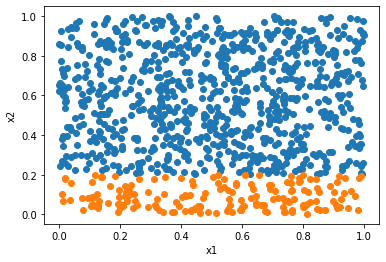

In [1261]:
x_scat_d1_l1 = D1[D1[:,-1]==1,0]
y_scat_d1_l1 = D1[D1[:,-1]==1,1]
x_scat_d1_l0 = D1[D1[:,-1]==0,0]
y_scat_d1_l0 = D1[D1[:,-1]==0,1]
plt.plot(x_scat_d1_l1, y_scat_d1_l1, 'o')
plt.plot(x_scat_d1_l0 , y_scat_d1_l0, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('D1scat.png')

Scatter plot for D2

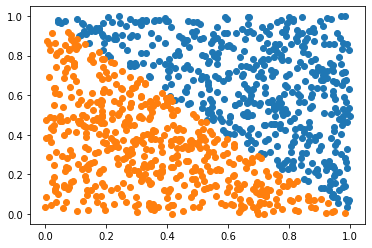

In [1262]:
x_scat_d2_l1 = D2[D2[:,-1]==1,0]
y_scat_d2_l1 = D2[D2[:,-1]==1,1]
x_scat_d2_l0 = D2[D2[:,-1]==0,0]
y_scat_d2_l0 = D2[D2[:,-1]==0,1]
plt.plot(x_scat_d2_l1, y_scat_d2_l1, 'o')
plt.plot(x_scat_d2_l0 , y_scat_d2_l0, 'o')
plt.savefig('D2scat.png')

In [1345]:
Dbig = np.loadtxt('Dbig.txt')
train_sample = random.sample(range(len(Dbig)), 10000)
testingset =  Dbig[train_sample[8192:]]

In [1346]:
Dt1 = Dbig[train_sample[:8192]]
Dt2 = Dbig[train_sample[:2048]]
Dt3 = Dbig[train_sample[:512]]
Dt4 = Dbig[train_sample[:128]]
Dt5 = Dbig[train_sample[:32]]

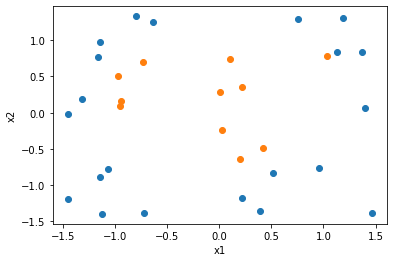

In [1363]:
x_scat_d1_l1 = Dt5[Dt5[:,-1]==1,0]
y_scat_d1_l1 = Dt5[Dt5[:,-1]==1,1]
x_scat_d1_l0 = Dt5[Dt5[:,-1]==0,0]
y_scat_d1_l0 = Dt5[Dt5[:,-1]==0,1]
plt.plot(x_scat_d1_l1, y_scat_d1_l1, 'o')
plt.plot(x_scat_d1_l0 , y_scat_d1_l0, 'o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.savefig('Dt5scat.png')

## Q1(7)

In [1364]:
mt1 = Decisiontree(Dt1)
mt1.tree = mt1._MakeSubtree(Dt1)
mt1.node

213

In [1365]:
mt2 = Decisiontree(Dt2)
mt2.tree = mt2._MakeSubtree(Dt2)
mt2.node

117

In [1366]:
mt3 = Decisiontree(Dt3)
mt3.tree = mt3._MakeSubtree(Dt3)
mt3.node

59

In [1367]:
mt4 = Decisiontree(Dt4)
mt4.tree = mt4._MakeSubtree(Dt4)
mt4.node

19

In [1368]:
mt5 = Decisiontree(Dt5)
mt5.tree = mt5._MakeSubtree(Dt5)
mt5.node

9

#calculate the accuracy

In [1356]:
count = 0
node_count = []
for i in range(len(testingset)):
  result,node_count_= tr_count(mt1.tree,testingset[i,:2],0)
  node_count.append(node_count_)
  if result['Pred']==testingset[i,-1]:
    count+=1
count/len(testingset)

0.9834070796460177

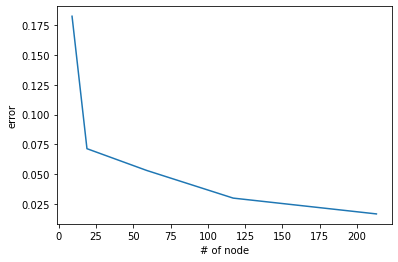

In [1357]:
error = [0.9834070796460177,0.9701327433628318,0.9469026548672567,0.9286504424778761,0.8174778761061947]
n = [213, 117,59,19,9]
plt.plot(np.asarray(n),1-np.asarray(error))
plt.xlabel('# of node')
plt.ylabel('error')
plt.savefig('nvserror.png')

## Q2 Using DecisionTreeClassifier from sklearn

In [1369]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
model = clf.fit(Dt1[:,:2], Dt1[:,-1])
clf.tree_.node_count, model.score(testingset[:,:2], testingset[:,-1])

(213, 0.9823008849557522)

In [1370]:
model = clf.fit(Dt2[:,:2], Dt2[:,-1])
clf.tree_.node_count, model.score(testingset[:,:2], testingset[:,-1])

(117, 0.9728982300884956)

In [1371]:
model = clf.fit(Dt3[:,:2], Dt3[:,-1])
clf.tree_.node_count, model.score(testingset[:,:2], testingset[:,-1])

(55, 0.9579646017699115)

In [1372]:
model = clf.fit(Dt4[:,:2], Dt4[:,-1])
clf.tree_.node_count, model.score(testingset[:,:2], testingset[:,-1])

(19, 0.9303097345132744)

In [1373]:
model = clf.fit(Dt5[:,:2], Dt5[:,-1])
clf.tree_.node_count, model.score(testingset[:,:2], testingset[:,-1])

(9, 0.8290929203539823)

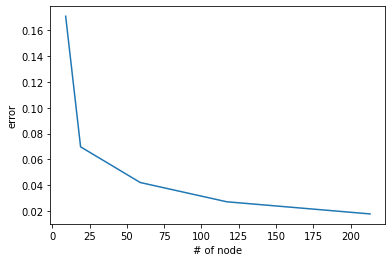

In [1374]:
error = [0.9823008849557522, 0.9728982300884956,0.9579646017699115,0.9303097345132744,0.8290929203539823]
n = [213, 117,59,19,9]
plt.plot(np.asarray(n),1-np.asarray(error))
plt.xlabel('# of node')
plt.ylabel('error')
plt.savefig('nvserror_sklearn.png')

In [1375]:
1-np.asarray(error)

array([0.01769912, 0.02710177, 0.0420354 , 0.06969027, 0.17090708])

## Q3

In [1428]:
x = np.random.uniform(0,1,100)
y = np.sin(x)
lagrange_intep = lagrange(x, y)

In [1429]:
x_test = np.random.uniform(0,1,100)
y_test = np.sin(x_test)

In [1430]:
mean_absolute_error(lagrange_intep(x),y)

1.8164823915036039e+78

In [1431]:
mean_absolute_error(lagrange_intep(x_test),y_test)

8.861581853640572e+77

In [1432]:
x = np.random.uniform(0,1,100) 
noise = np.random.normal(0,1,100)
y = np.sin(x)
lagrange_intep = lagrange(x+noise, y)
x_test = np.random.uniform(0,1,100)
y_test = np.sin(x_test)

In [1433]:
mean_absolute_error(lagrange_intep(x),y)

3.79253028703254e+18

In [1434]:
mean_absolute_error(lagrange_intep(x_test),y_test)

1.4781164782151807e+19

In [1435]:
x = np.random.uniform(0,1,100)
noise = np.random.normal(0,2,100)
y = np.sin(x)
lagrange_intep = lagrange(x+noise, y)
x_test = np.random.uniform(0,1,100)
y_test = np.sin(x_test)

In [1436]:
mean_absolute_error(lagrange_intep(x),y)

4135138500.9663844

In [1419]:
mean_absolute_error(lagrange_intep(x_test),y_test)

100164113734.91736